<h1><center>Effect of Socioeconomic Status on Obesity</center></h1>

This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding. The goal of this analysist is to compare the obesity rate in each state, and then perform a linear regression on the obesity rate for each educational status and the income bracket.

The data is taken from https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7. Please go to the cdc website for complete description of the dataset.

The idea and some of the codes of this project is taken from https://www.kaggle.com/spittman1248/effect-of-socioeconomic-status-on-obesity.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

<h2>Reading the data</h2>

In [2]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
pd.set_option("display.max_columns", None)
df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.3,29.3,NaN,NaN,25.7,33.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
1,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.7,32.7,NaN,NaN,31.9,33.5,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR


<h2>Explore the data</h2>

In [3]:
# get a quick description of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80929 entries, 0 to 80928
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   80929 non-null  int64  
 1   YearEnd                     80929 non-null  int64  
 2   LocationAbbr                80929 non-null  object 
 3   LocationDesc                80929 non-null  object 
 4   Datasource                  80929 non-null  object 
 5   Class                       80929 non-null  object 
 6   Topic                       80929 non-null  object 
 7   Question                    80929 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             80929 non-null  object 
 10  Data_Value                  72965 non-null  float64
 11  Data_Value_Alt              72965 non-null  float64
 12  Data_Value_Footnote_Symbol  7964 non-null   object 
 13  Data_Value_Footnote         796

In [4]:
# Dropping irrelevant columns

df=df.drop(["YearEnd", "Datasource", "Topic", "Data_Value_Unit", "Data_Value_Type", 
            "Data_Value_Footnote_Symbol","Data_Value_Footnote", "Low_Confidence_Limit","High_Confidence_Limit ",
            "QuestionID","ClassID","TopicID", "DataValueTypeID", 
            "StratificationCategoryId1","StratificationID1"], axis=1)
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Class', 'Question',
       'Data_Value', 'Data_Value_Alt', 'Sample_Size', 'Total', 'Age(years)',
       'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation',
       'LocationID', 'StratificationCategory1', 'Stratification1'],
      dtype='object')

In [5]:
# Rename the columns

df.rename(columns={"YearStart":"Year"}, inplace=True)
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Class', 'Question',
       'Data_Value', 'Data_Value_Alt', 'Sample_Size', 'Total', 'Age(years)',
       'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation',
       'LocationID', 'StratificationCategory1', 'Stratification1'],
      dtype='object')

In [6]:
# Find the unique value of "Year" in df

print(sorted(df.Year.unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [7]:
# Find the unique value of "LocationDesc" in df

print(sorted(df.LocationDesc.unique()))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [8]:
# Find the lenght of unique "LocationDesc" in df

len(df.LocationDesc.unique())

55

We will analyze the data from 2018 only since it is the most recent and more complete in comparison to the data from 2019 and 2020 (the data from 2019 and 2020 doesn't include Virginia). We will exclude data from Guam, Puerto Rico, and Virgin Islands. 

Note that few of the previous years have more data than 2018, but 2018 is chosen since it is more recent.

In [9]:
# Select data from 2018 and created df2

df2=df.loc[(df.Year == 2018)]

# Select national data from df2 and call it df2n for later analysis
df2n = df2[(df2['LocationDesc']=='National')]
df2n = df2n.reset_index(drop = True)

# Remove National, Guam, and Puerto Rico, Virgin Islands from df2

df2=df2[~(df2['LocationDesc']=='National')]
df2=df2[~(df2['LocationDesc']=='Guam')]
df2=df2[~(df2['LocationDesc']=='Puerto Rico')]
df2=df2[~(df2['LocationDesc']=='Virgin Islands')]
df2 = df2.reset_index(drop = True)

df2.head()

,Year,LocationAbbr,LocationDesc,Class,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2018,MD,Maryland,Physical Activity,Percent of adults who engage in no leisure-tim...,32.5,32.5,671.0,NaN,NaN,NaN,NaN,NaN,Hispanic,"(39.29058096400047, -76.60926011099963)",24,Race/Ethnicity,Hispanic
1,2018,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.9,31.9,719.0,NaN,35 - 44,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Age (years),35 - 44
2,2018,TX,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.2,27.2,5451.0,NaN,NaN,NaN,Female,NaN,NaN,"(31.827240407000488, -99.42677020599967)",48,Gender,Female
3,2018,IA,Iowa,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.0,38.0,2654.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(42.46940091300047, -93.81649055599968)",19,Education,High school graduate
4,2018,TX,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,33.5,4698.0,NaN,NaN,NaN,Male,NaN,NaN,"(31.827240407000488, -99.42677020599967)",48,Gender,Male


In [10]:
# Find the unique value of "LocationDesc" in the df2

print(sorted(df2.LocationDesc.unique()))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [11]:
# Find the lenght of unique "LocationDesc" in df2

len(df2.LocationDesc.unique())

51

In [12]:
# get a quick description of df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4284 non-null   int64  
 1   LocationAbbr             4284 non-null   object 
 2   LocationDesc             4284 non-null   object 
 3   Class                    4284 non-null   object 
 4   Question                 4284 non-null   object 
 5   Data_Value               3893 non-null   float64
 6   Data_Value_Alt           3893 non-null   float64
 7   Sample_Size              3893 non-null   float64
 8   Total                    153 non-null    object 
 9   Age(years)               918 non-null    object 
 10  Education                612 non-null    object 
 11  Gender                   306 non-null    object 
 12  Income                   1071 non-null   object 
 13  Race/Ethnicity           1224 non-null   object 
 14  GeoLocation             

In [13]:
#Create separate Dataform from df by gender df2_gen, by education level df2_edu, 
# and by income df2_edu

df2_gen=df2[(df2['Stratification1']=='Male')|(df2['Stratification1']=='Female')]
df2_edu=df2[df2['StratificationCategory1']=='Education']
df2_inc=df2[df2['StratificationCategory1']=='Income']

#reset index for each of the new dataforms

df2_gen = df2_gen.reset_index(drop = True)
df2_edu = df2_edu.reset_index(drop = True)
df2_inc = df2_inc.reset_index(drop = True)

In [14]:
# Check out the first few rows of df2_edu

df2_edu.head(3)

,Year,LocationAbbr,LocationDesc,Class,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2018,IA,Iowa,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.0,38.0,2654.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(42.46940091300047, -93.81649055599968)",19,Education,High school graduate
1,2018,MA,Massachusetts,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.1,37.1,1133.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(42.27687047000046, -72.08269067499964)",25,Education,High school graduate
2,2018,SC,South Carolina,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.8,36.8,2974.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(33.998821303000454, -81.04537120699968)",45,Education,High school graduate


In [15]:
# check out the first few rows of df2_gen

df2_gen.head(3)

,Year,LocationAbbr,LocationDesc,Class,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2018,TX,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.2,27.2,5451.0,NaN,NaN,NaN,Female,NaN,NaN,"(31.827240407000488, -99.42677020599967)",48,Gender,Female
1,2018,TX,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,33.5,4698.0,NaN,NaN,NaN,Male,NaN,NaN,"(31.827240407000488, -99.42677020599967)",48,Gender,Male
2,2018,NJ,New Jersey,Physical Activity,Percent of adults who engage in no leisure-tim...,30.8,30.8,1601.0,NaN,NaN,NaN,Female,NaN,NaN,"(40.13057004800049, -74.27369128799967)",34,Gender,Female


In [16]:
# Check out the first few rows of df2_inc

df2_inc.head(3)

,Year,LocationAbbr,LocationDesc,Class,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2018,MI,Michigan,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.5,27.5,702.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,"(44.6613195430005, -84.71439026999968)",26,Income,"Less than $15,000"
1,2018,AZ,Arizona,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.9,33.9,1140.0,NaN,NaN,NaN,NaN,Data not reported,NaN,"(34.865970280000454, -111.76381127699972)",4,Income,Data not reported
2,2018,VT,Vermont,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.8,29.8,556.0,NaN,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(43.62538123900049, -72.51764079099962)",50,Income,"$25,000 - $34,999"


In [17]:
# get the questionare given in the 2018 survey

df2.Question.unique()

array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults aged 18 years and older who have obesity'],
      dtype=object)

In [18]:
# Select the data related to 'Percent of adults aged 18 years and older who have obesity'

X=['Percent of adults aged 18 years and older who have obesity']
df2_gen=df2_gen[df2_gen['Question']==X[0]]
#df2_gen.head()
df2_gen.shape

(102, 18)

<h3>Obesity over Male and Female in Each State</h3>

In [19]:
# Select the data related to 'Percent of adults aged 18 years and older who have obesity' and
# it is either 'Male' or 'Female'

df2n=df2n[df2n['Question']==X[0]]
df2n=df2n[(df2n['Stratification1']=='Male')|(df2n['Stratification1']=='Female')]

#calculate the average obesity rate (over men and women) for the country

natmeanobesity2018=sum(df2n['Data_Value'])/len(df2n)
print(natmeanobesity2018)

30.950000000000003


In [20]:
# Group df2_gen by LocationDesc and calculate the mean of Data_Value to create df2_gen_new 

gen_features = ["LocationAbbr", "LocationDesc", "Data_Value", "Gender"]
df2_gen_features = df2_gen[gen_features]
df2_gen_new = df2_gen_features.groupby(["LocationDesc"], as_index=False).mean()
df2_gen_new.sort_values(by=['Data_Value'], inplace=True, ascending=False)

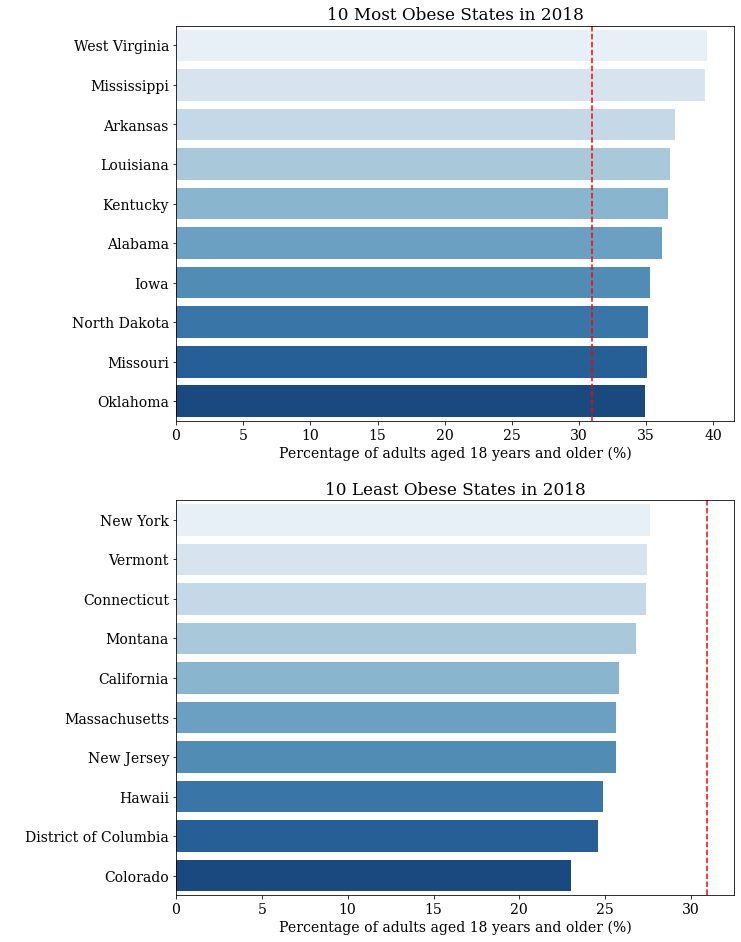

In [21]:
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(x=df2_gen_new.head(10).Data_Value, y=df2_gen_new.head(10).LocationDesc, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage of adults aged 18 years and older (%)')
ax.set_title('10 Most Obese States in 2018')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(x=df2_gen_new.tail(10).Data_Value, y=df2_gen_new.tail(10).LocationDesc, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage of adults aged 18 years and older (%)')
ax.set_title('10 Least Obese States in 2018')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

<h3>Effect of Income on Obesity</h3>

In [22]:
# get the dimension of df2_inc which associated with question 'Percent of adults aged 18 years 
# and older who have obesity'

df2_inc=df2_inc[df2_inc['Question']==X[0]]
#df2_gen.head()
df2_inc.shape

(357, 18)

In [23]:
# Group df2_inc by LocationDesc and Income to create df2_inc_new

inc_features = ["LocationAbbr", "LocationDesc", "Data_Value", "Income"]
df2_inc_features = df2_inc[inc_features]
df2_inc_new = df2_inc_features.groupby(["LocationDesc", "Income"], as_index=False).mean()
#df2_inc_new.set_index("LocationDesc", inplace=True)  
df2_inc_new.head(5)

,LocationDesc,Income,Data_Value
0,Alabama,"$15,000 - $24,999",38.4
1,Alabama,"$25,000 - $34,999",35.1
2,Alabama,"$35,000 - $49,999",37.7
3,Alabama,"$50,000 - $74,999",38.6
4,Alabama,"$75,000 or greater",32.1


In [24]:
# Select the data from "Less than $15,000" to create df2_inc_low

df2_inc_low = df2_inc_new.loc[df2_inc_new.Income == "Less than $15,000"]
df2_inc_low.sort_values(by=['Data_Value'], inplace=True, ascending=False)

C:\Miniconda\envs\IBM_DS\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


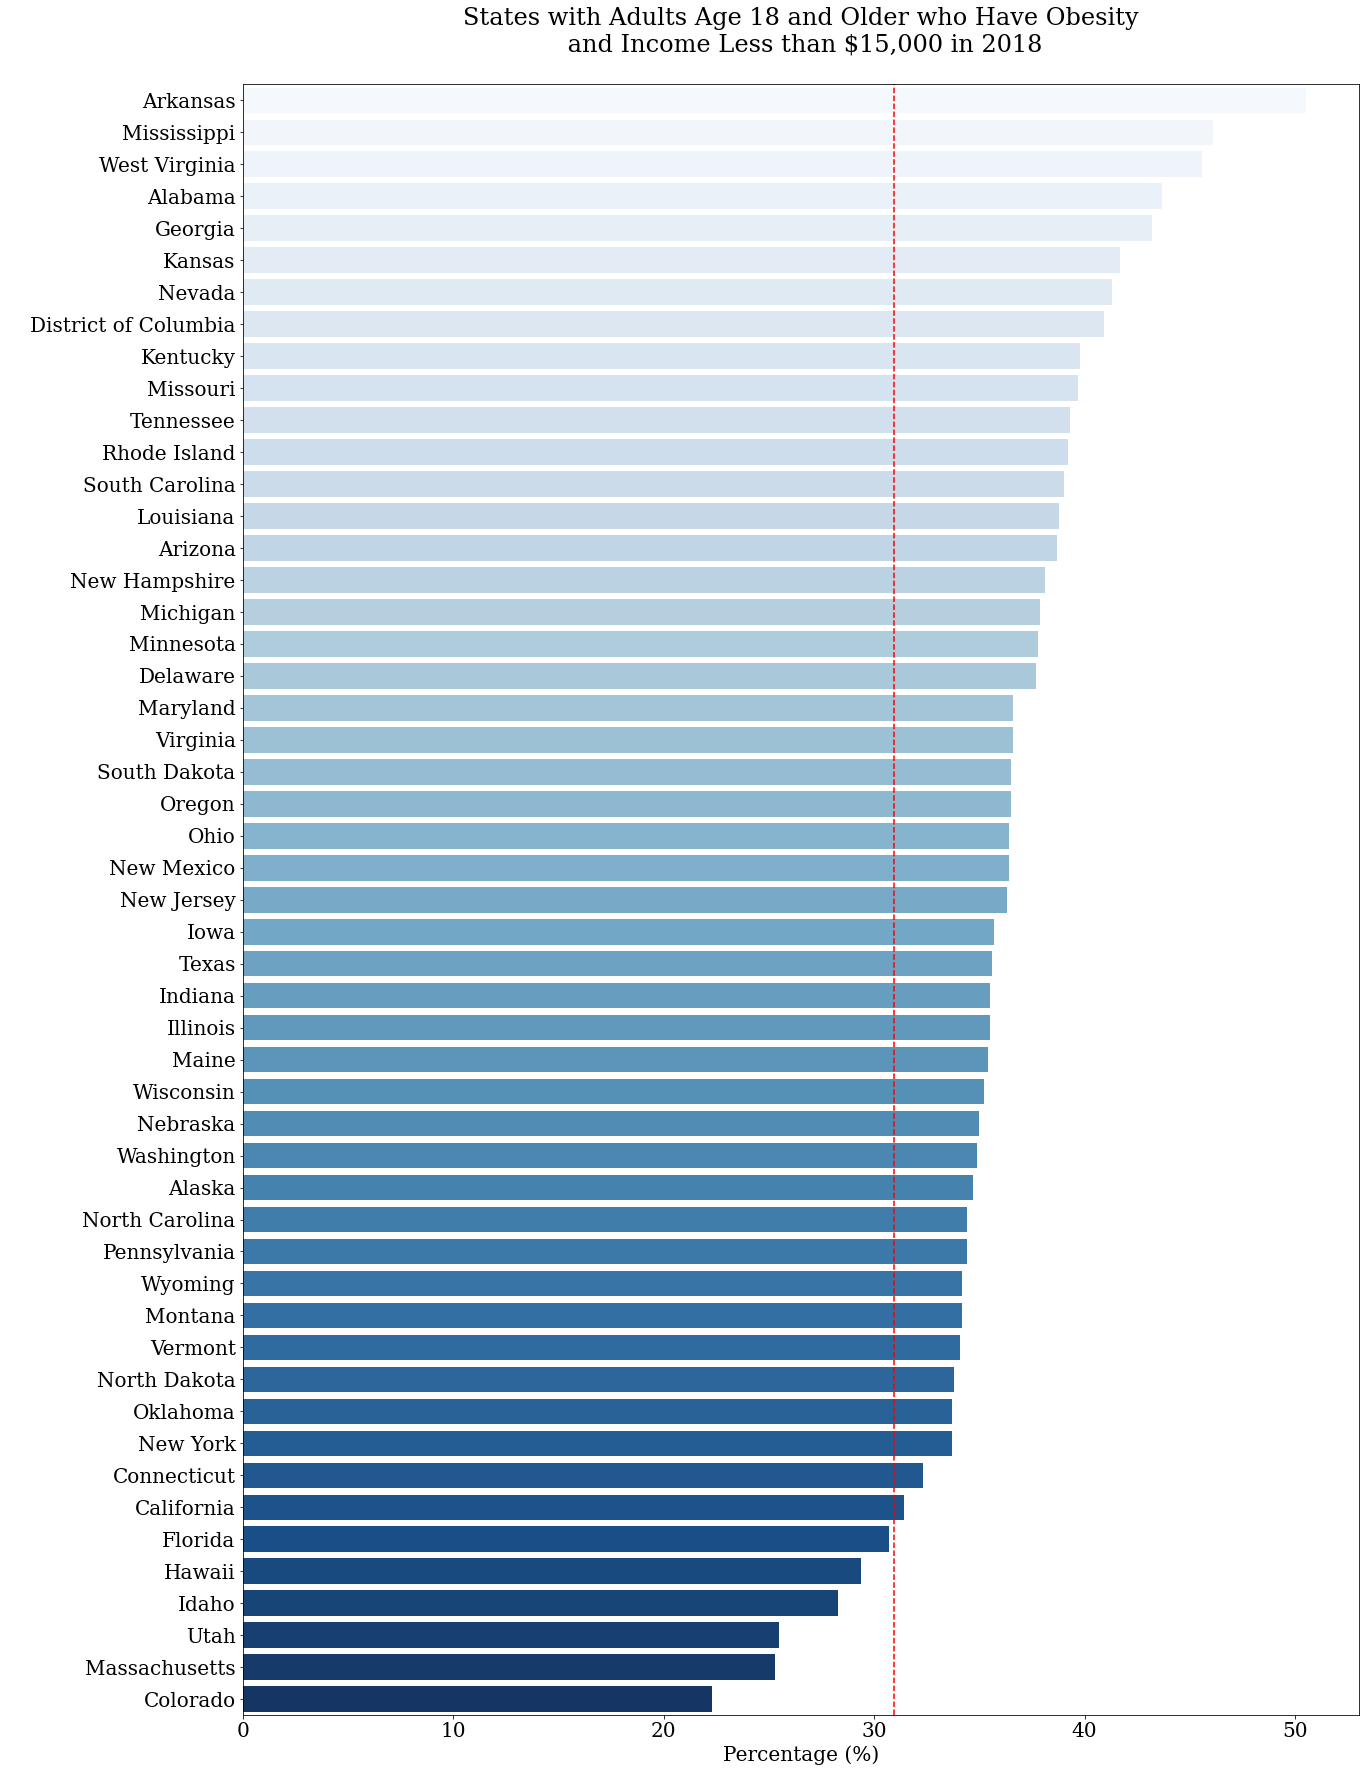

In [25]:
# Let's visualize the obesity rate of adult age 18 and Older with income less than $15,000
# by states

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (20,30))

ax=sns.barplot(x=df2_inc_low.Data_Value, y=df2_inc_low.LocationDesc, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage (%)')
ax.set_title('States with Adults Age 18 and Older who Have Obesity\n and Income Less than $15,000 in 2018\n')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

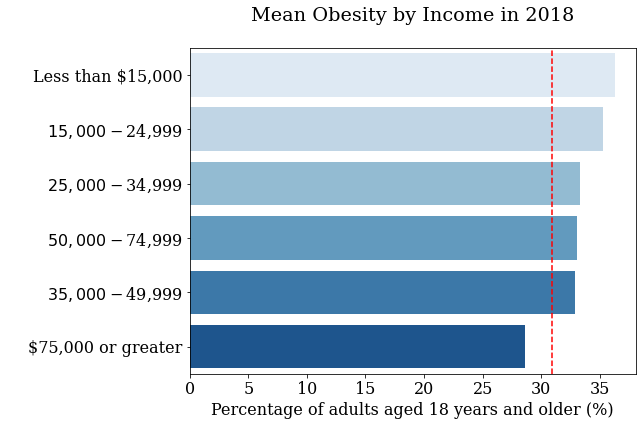

In [26]:
# Let's visualize the mean obesity rate of adult age 18 and older based on education level

# Group df2_inc_features by Income to create df2_inc_new2
df2_inc_new2 = df2_inc_features.groupby(["Income"], as_index=False).mean()

# Drop Income equals to "Data not reported" since it won't be any helpful for us

df2_inc_new2 = df2_inc_new2[~(df2_inc_new2.Income == "Data not reported")]
df2_inc_new2 = df2_inc_new2.reset_index(drop=True) # reset index
df2_inc_new2.sort_values(by=['Data_Value'], inplace=True, ascending=False) #sort data

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize = (8,6))

ax=sns.barplot(x=df2_inc_new2.Data_Value, y=df2_inc_new2.Income, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage of adults aged 18 years and older (%)')
ax.set_title('Mean Obesity by Income in 2018\n')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

<h4>ANOVA: Analysis of Variance</h4>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our Data_Value variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [27]:
df2_inc_anv = df2_inc_features[["Income", "Data_Value"]].groupby(["Income"])
df2_inc_anv.head(1)

,Income,Data_Value
3,"Less than $15,000",41.3
4,"$50,000 - $74,999",35.0
9,"$75,000 or greater",34.0
18,"$35,000 - $49,999",28.8
19,Data not reported,29.8
33,"$15,000 - $24,999",35.1
37,"$25,000 - $34,999",38.1


In [28]:
df2_inc_anv.Income.unique()

Income
$15,000 - $24,999      [$15,000 - $24,999]
$25,000 - $34,999      [$25,000 - $34,999]
$35,000 - $49,999      [$35,000 - $49,999]
$50,000 - $74,999      [$50,000 - $74,999]
$75,000 or greater    [$75,000 or greater]
Data not reported      [Data not reported]
Less than $15,000      [Less than $15,000]
Name: Income, dtype: object

In [29]:
from scipy import stats
# ANOVA
f_val, p_val = stats.f_oneway(df2_inc_anv.get_group('Less than $15,000')['Data_Value'],
                              df2_inc_anv.get_group('$15,000 - $24,999')['Data_Value'],
                              df2_inc_anv.get_group('$35,000 - $49,999')['Data_Value'],
                              df2_inc_anv.get_group('$50,000 - $74,999')['Data_Value'],
                              df2_inc_anv.get_group('$25,000 - $34,999')['Data_Value'],
                              df2_inc_anv.get_group('$75,000 or greater')['Data_Value'],)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 17.72750242785245 , P = 2.1578059722089567e-15


There was a statistically significant difference between income groups as determined by one-way ANOVA (F one-way = 17.73, p is close to zero).

<h3>Effect of Education on Obesity</h3>

In [30]:
# get the dimension of df2_edu which associated with question 'Percent of adults aged 18 years 
# and older who have obesity'

df2_edu=df2_edu[df2_edu['Question']==X[0]]
#df2_gen.head()
df2_edu.shape

(204, 18)

In [31]:
# Group df2_edu by LocationDesc and Education to create df2_edu_new

edu_features = ["LocationAbbr", "LocationDesc", "Data_Value", "Education"]
df2_edu_features = df2_edu[edu_features]
df2_edu_new = df2_edu_features.groupby(["LocationDesc", "Education"], as_index=False).mean()  
df2_edu_new.head(5)

,LocationDesc,Education,Data_Value
0,Alabama,College graduate,29.4
1,Alabama,High school graduate,36.6
2,Alabama,Less than high school,39.2
3,Alabama,Some college or technical school,39.2
4,Alaska,College graduate,24.0


In [32]:
# Find the unique value of 'Education'

df2_edu_new.Education.unique()

array(['College graduate', 'High school graduate',
       'Less than high school', 'Some college or technical school'],
      dtype=object)

In [33]:
# Select the data from "Less than high school" to create df2_edu_low

df2_edu_low = df2_edu_new.loc[df2_edu_new.Education == "Less than high school"]
df2_edu_low.sort_values(by=['Data_Value'], inplace=True, ascending=False)

C:\Miniconda\envs\IBM_DS\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


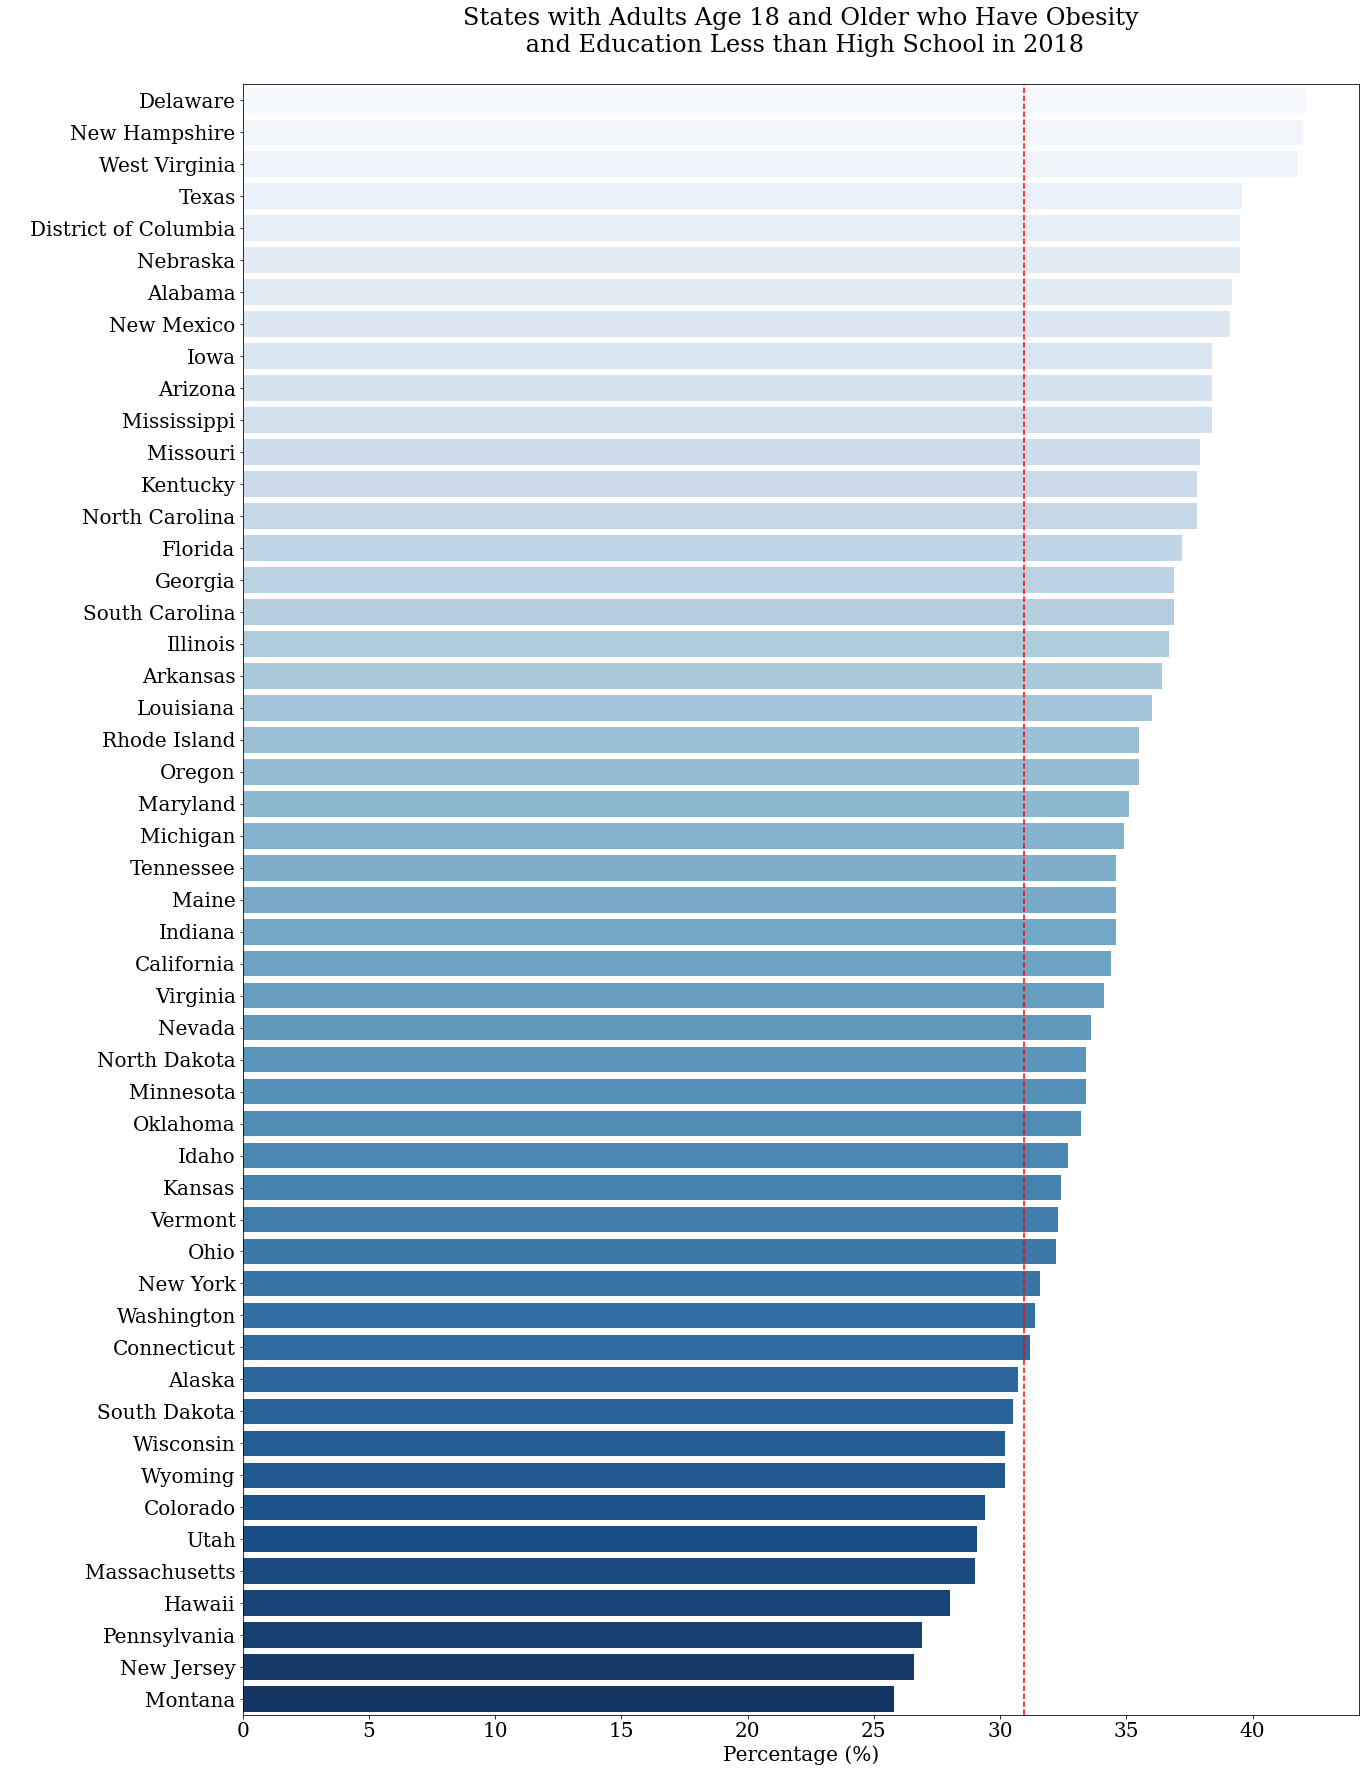

In [34]:
# Let's visualize the obesity rate of adult age 18 and Older with education less than high
# school by states

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (20,30))

ax=sns.barplot(x=df2_edu_low.Data_Value, y=df2_edu_low.LocationDesc, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage (%)')
ax.set_title('States with Adults Age 18 and Older who Have Obesity\n and Education Less than High School in 2018\n')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

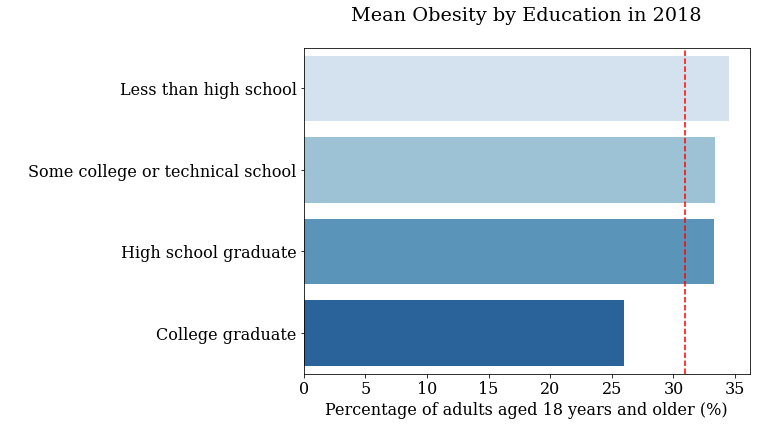

In [35]:
# Let's visualize the mean obesity rate of adult age 18 and Older based on education level

df2_edu_new2 = df2_edu_features.groupby(["Education"], as_index=False).mean()
df2_edu_new2.sort_values(by=['Data_Value'], inplace=True, ascending=False)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize = (8,6))

ax=sns.barplot(x=df2_edu_new2.Data_Value, y=df2_edu_new2.Education, palette="Blues")
ax.set_ylabel(' ')
ax.set_xlabel('Percentage of adults aged 18 years and older (%)')
ax.set_title('Mean Obesity by Education in 2018\n')

plt.axvline(x=natmeanobesity2018, ls='--', color = 'r')

<h4>Let us calculate the ANOVA</h4>

In [36]:
df2_edu_anv = df2_edu_features[["Education", "Data_Value"]].groupby(["Education"])
df2_edu_anv.head(1)

,Education,Data_Value
0,High school graduate,38.0
3,Less than high school,39.1
8,College graduate,23.1
27,Some college or technical school,35.7


In [37]:
df2_edu_anv.Education.unique()

Education
College graduate                                    [College graduate]
High school graduate                            [High school graduate]
Less than high school                          [Less than high school]
Some college or technical school    [Some college or technical school]
Name: Education, dtype: object

In [38]:
f_val, p_val = stats.f_oneway(df2_edu_anv.get_group('College graduate')['Data_Value'],
                              df2_edu_anv.get_group('High school graduate')['Data_Value'],
                              df2_edu_anv.get_group('Less than high school')['Data_Value'],
                              df2_edu_anv.get_group('Some college or technical school')['Data_Value'],
                             )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 44.47486850590439 , P = 4.587966132576498e-22


There was a statistically significant difference between education groups as determined by one-way ANOVA (F one-way = 44.47, p is close to zero).

<h2>Linear Regression: Effect of Income on Obesity</h2>

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy import stats

In [40]:
# Will use this later to evaluate the cross-validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [41]:
# Create dummy variables from df2_inc_new

dummy_inc = pd.get_dummies(df2_inc_new["Income"])

# Create a copy of df called df_inc_LR, then concatenate the above dummy variables into df_inc_LR.

df_inc_LR = df2_inc_new.copy()
df_inc_LR = pd.concat([df_inc_LR, dummy_inc], axis=1)
df_inc_LR.drop(["Income", "Data not reported"], axis = 1, inplace=True)

df_inc_LR= df_inc_LR[['LocationDesc', 'Data_Value', 'Less than $15,000','$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater']]

df_inc_LR.head()

,LocationDesc,Data_Value,"Less than $15,000","$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater"
0,Alabama,38.4,0,1,0,0,0,0
1,Alabama,35.1,0,0,1,0,0,0
2,Alabama,37.7,0,0,0,1,0,0
3,Alabama,38.6,0,0,0,0,1,0
4,Alabama,32.1,0,0,0,0,0,1


In [42]:
# Define feature matrix x1

x1 = df_inc_LR.iloc[:, 2:8].values
print(x1.shape)
x1[0:5]

(357, 6)


array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [43]:
# Define target vector y1

y1 = df_inc_LR["Data_Value"]
y1[0:5]

0    38.4
1    35.1
2    37.7
3    38.6
4    32.1
Name: Data_Value, dtype: float64

In [44]:
# Split x1 and y1 into train set and test set

x1_train, x1_test, y1_train, y1_test = train_test_split( x1, y1, test_size=0.2, random_state=0)
print ('Train set:', x1_train.shape,  y1_train.shape)
print ('Test set:', x1_test.shape,  y1_test.shape)

Train set: (285, 6) (285,)
Test set: (72, 6) (72,)


In [45]:
# Create a linear Regression object and fit the model

lr1=LinearRegression()
lr1.fit(x1_train, y1_train)
print ('Coefficients: ', lr1.coef_)
print ('Intercept: ',lr1.intercept_)

Coefficients:  [9.27241015 8.84915433 6.50174825 6.37583732 6.57320574 2.19386364]
Intercept:  26.71363636363637


In [46]:
# Use cross-validation to get an estimate of a model’s generalization

r2scores_inc = cross_val_score(lr1, x1_train, y1_train, cv=10)
display_scores(r2scores_inc)

Scores: [ 0.13622527  0.38366573  0.4151932   0.33602674  0.46514592  0.14994767
  0.19203184  0.47111662 -0.11703956  0.29433611]
Mean: 0.27266495340427693
Standard deviation: 0.17481374175000736


The mean of $R^2$ score is 0.27, which is very low. This shows the model doesn't generalize well.

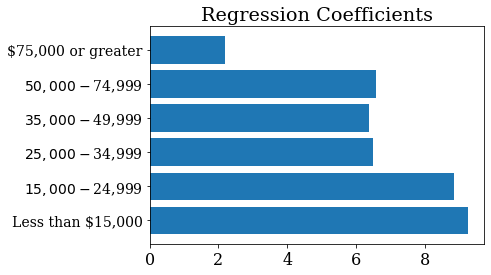

In [47]:
# Visualize the regression coefficient

plt.barh([0,1,2,3,4,5],lr1.coef_)
plt.yticks(range(6),df_inc_LR.columns[2:8], fontsize = 14)
plt.title('Regression Coefficients')

plt.show()

We can see the proportions of the regression coefficients is similar to the propotion of the Mean Obesity by Income from the previous figure (with the exception of income 35,000 - 49,999 and 50,000 - 74,999 which proportions are very closed to each other). This makes sense. 

In [48]:
y_hat_inc= lr1.predict(x1_test)
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat_inc - y1_test) ** 2)))
print("R2-score of test set: %.2f" % r2_score(y1_test, y_hat_inc) )
print("R2-score of train set: %.2f" % r2_score(y1_train, lr1.predict(x1_train)) )

Root Mean Square Error (RMSE): 4.10
R2-score of test set: 0.31
R2-score of train set: 0.35


The $R^2$ of the test set and train set is very low, which means our data is not close to the fitted regression line. This show that there is low correlation between income levels and obesity. This is not surprising since humans are simply harder to predict.

<h2>Linear Regression: Effect of Education on Obesity</h2>

In [49]:
# Create dummy variables from df2_edu_new

dummy_edu = pd.get_dummies(df2_edu_new["Education"])

# Create a copy of df called df_edu_LR, then concatenate the above dummy variables into df_edu_LR.

df_edu_LR = df2_edu_new.copy()
df_edu_LR = pd.concat([df_edu_LR, dummy_edu], axis=1)
df_edu_LR.drop(["Education"], axis = 1, inplace=True)
df_edu_LR.head()

,LocationDesc,Data_Value,College graduate,High school graduate,Less than high school,Some college or technical school
0,Alabama,29.4,1,0,0,0
1,Alabama,36.6,0,1,0,0
2,Alabama,39.2,0,0,1,0
3,Alabama,39.2,0,0,0,1
4,Alaska,24.0,1,0,0,0


In [50]:
# Define feature matrix x

x = df_edu_LR.iloc[:, 2:6].values
print(x.shape)
x[0:5]

(204, 4)


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=uint8)

In [51]:
# Define target vector y

y = df_edu_LR["Data_Value"]
y[0:5]

0    29.4
1    36.6
2    39.2
3    39.2
4    24.0
Name: Data_Value, dtype: float64

In [52]:
# Split the x and y into train set and test set

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (163, 4) (163,)
Test set: (41, 4) (41,)


In [53]:
# Create a linear Regression object and fit the model

lr=LinearRegression()
lr.fit(x_train, y_train)
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [-5.73946998  1.18060507  3.18979831  1.3690666 ]
Intercept:  31.680933395872422


In [54]:
# Use cross-validation to get an estimate of a model’s generalization

r2scores = cross_val_score(lr, x_train, y_train, cv=8)
display_scores(r2scores)

Scores: [ 0.54356499  0.19022523 -0.08654047  0.22557506  0.34287539  0.63783927
  0.46868827  0.0341027 ]
Mean: 0.2945413035932526
Standard deviation: 0.23484553762132512


The mean of $R^2$ score is 0.29, which is very low. This shows the model doesn't generalize well.

In [55]:
# We want to sort the lr.coef_ so it easier to visualize
lr.coef_new = np.sort(lr.coef_)
lr.coef_new

array([-5.73946998,  1.18060507,  1.3690666 ,  3.18979831])

In [56]:
# We want to get the original index of lr.coef_ after sorting so we can use in the visualization
import numpy
numpy.argsort(lr.coef_)

array([0, 1, 3, 2], dtype=int64)

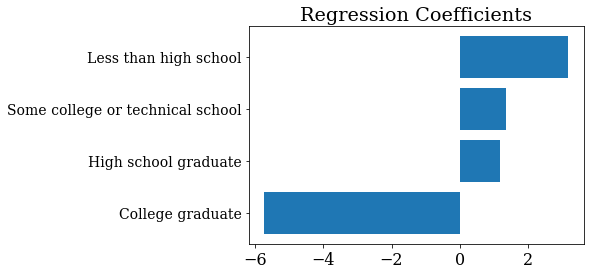

In [57]:
# Visualize the regression coefficient

plt.barh([0,1,2,3],lr.coef_new)

# We need to add 2 since the columns of df_edu_LR starts with LocationDesc (col 0) and Data_Value (col 1)
plt.yticks(range(4),df_edu_LR.columns[numpy.argsort(lr.coef_ )+2], fontsize = 14)
plt.title('Regression Coefficients')

plt.show()

The proportions of the regression coefficients almost similar to the propotion of the Mean Obesity by Education from the previous figure. This is expected. 

In [58]:
y_hat= lr.predict(x_test)
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
print("R2-score of test set: %.2f" % r2_score(y_test, y_hat) )
print("R2-score of train set: %.2f" % r2_score(y_train, lr.predict(x_train)) )

Root Mean Square Error (RMSE): 4.10
R2-score of test set: 0.36
R2-score of train set: 0.40


The $R^2$ of the test set and train set is also very low, which means our data is not close to the fitted regression line. This show that there is low correlation between education levels and obesity